Dataset Breas Cancer Wisconsin. Zawierajcay 569 przykładów łagodnych(B) i złoścliwych(M) komórek nowtowrowych. Kolumny od 3 do 32 top cechy obrazów cycfrowych jądra komórkowego 

In [51]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                header=None)

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Przekształcanie M i B w znaki za pomocą funkcji 

In [53]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:, 1].values

In [54]:
le = LabelEncoder()

In [55]:
y = le.fit_transform(y)

In [56]:
le.classes_

array(['B', 'M'], dtype=object)

In [57]:
le.transform(["M","B"])

array([1, 0])

In [58]:
####  DZIELENIE ZBIORÓW ###
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(X,y,test_size=0.2, stratify=y, 
                                                                  random_state=1)

### Łączenie funcji tranformujących i estymatorów w kolejce
Schemat działanie potoku 
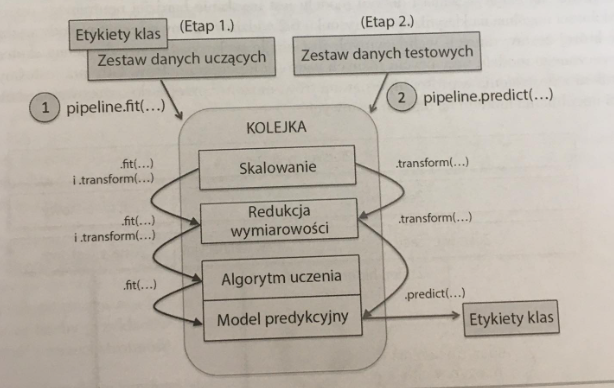

#### NA KOŃCU KAŻDEGO PIPELINEA MUSI ZNALEŹC SIE ESTYMATOR !!

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [60]:
pipeline_lr = make_pipeline(StandardScaler(),
                           PCA(n_components=2),
                           LogisticRegression(random_state=1, solver="lbfgs"))

In [61]:
pipeline_lr.fit(train_data, train_label)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [62]:
y_pred = pipeline_lr.predict(test_data)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [63]:
pipeline_lr.score(train_data, train_label)

0.9538461538461539

### Crossvalidation
Najlepszym kompromisem jest podzielenie zbioru na k=10 pozbiorów, jelśli zbiór jest bardzo mały można zwiekszyć podział k=15, jeśli bardzo duży zmniejszyć k=5.
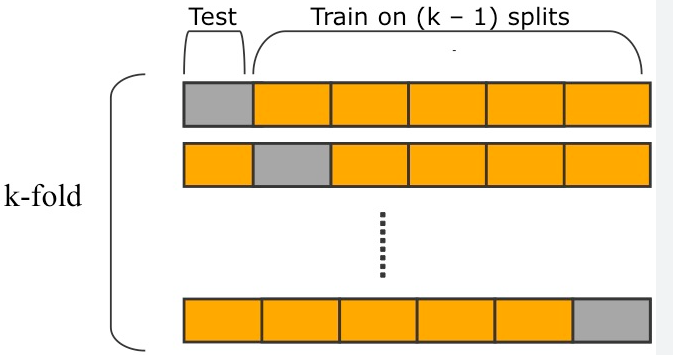
#### Gdy zbiór jest bardzo mały można przeprowadzic walidacjie LOOCV, gdzie zbiór walidacyjny pozostaje cały czas taki sam 
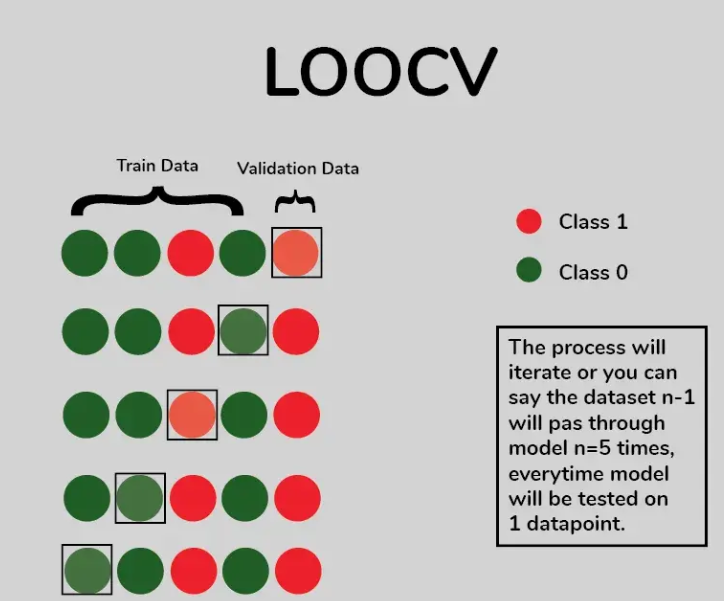
Najlpiej radzi sobie stratyfikowana krosswalidacja, gdzie proprcje w danych uczących za zachowane 

In [64]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [65]:
strat_cross = StratifiedKFold(n_splits=10).split(train_data, train_label) # k=10

In [66]:
scores = []
for i, (train, test) in enumerate(strat_cross):
    pipeline_lr.fit(train_data[train], train_label[train])
    score = pipeline_lr.score(train_data[test], train_label[test])
    scores.append(score)
    print("Podzbiór: %d, Rozkład klasy: %s, Dokładność: %.3f" % (i+1,
                                                                np.bincount(train_label[train]),score))

Podzbiór: 1, Rozkład klasy: [256 153], Dokładność: 0.935
Podzbiór: 2, Rozkład klasy: [256 153], Dokładność: 0.935
Podzbiór: 3, Rozkład klasy: [256 153], Dokładność: 0.957
Podzbiór: 4, Rozkład klasy: [256 153], Dokładność: 0.957
Podzbiór: 5, Rozkład klasy: [256 153], Dokładność: 0.935
Podzbiór: 6, Rozkład klasy: [257 153], Dokładność: 0.956
Podzbiór: 7, Rozkład klasy: [257 153], Dokładność: 0.978
Podzbiór: 8, Rozkład klasy: [257 153], Dokładność: 0.933
Podzbiór: 9, Rozkład klasy: [257 153], Dokładność: 0.956
Podzbiór: 10, Rozkład klasy: [257 153], Dokładność: 0.956


Warstwowa kroswalidacja 

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
# n_jobs - parametr zaprzęgający procsesory do pracy =2(2 procesoey) =3(3 procesory) =-1(wszystkie)
scores_ = cross_val_score(estimator=pipeline_lr, X=train_data,
                         y=train_label, cv=10, n_jobs=1)
print("Wynik dokładności sprowadzianu:", scores_)

Wynik dokładności sprowadzianu: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


### Krzywe Uczenia i Krzywe Walidacji 
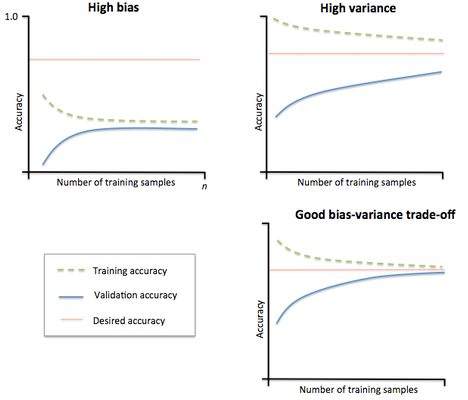
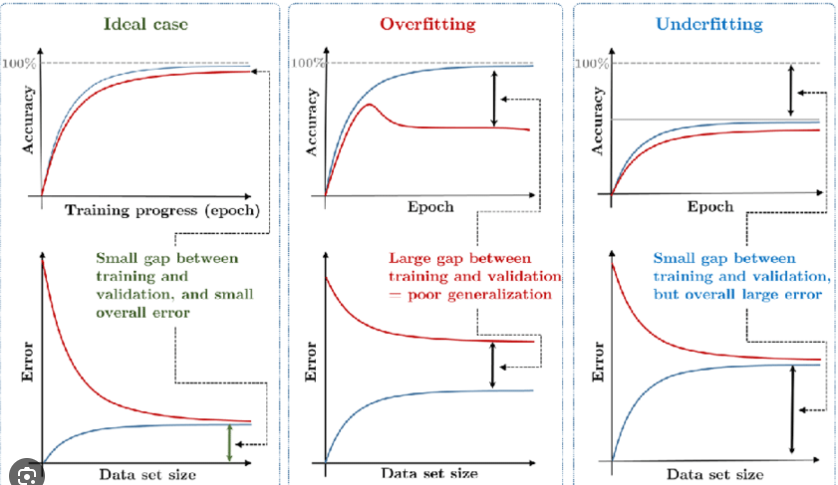

In [69]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#### Wykres krzywych uczenia

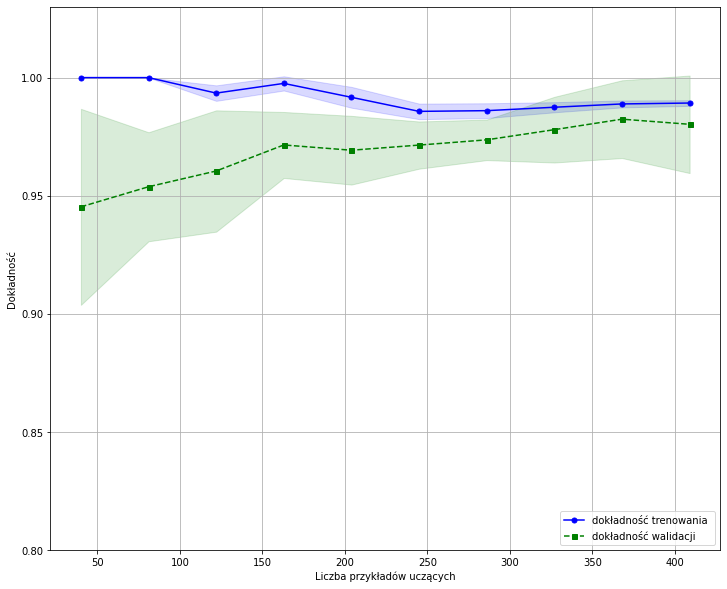

'\ntrain_sizes - zawiera bezwzgledna luw wzgleda liczbe przykładów uczących, rozłożonych równomiernie\ntrain_sizes=np.linspace(0.1,1.0,10), 10 zestawów uczących równomiernie rozłożonych \n'

In [70]:
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000,solver="lbfgs"))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=train_data,
                                                       y=train_label,
                                                       train_sizes=np.linspace(0.1,1.0,10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,10))
plt.plot(train_sizes, train_mean, color="blue",
        marker="o", markersize=5, label="dokładność trenowania ")
plt.fill_between(train_sizes, 
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color="green", linestyle="--",
        marker="s", markersize=5, label="dokładność walidacji ")
plt.fill_between(train_sizes, 
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15, color="green")

plt.grid()
plt.xlabel("Liczba przykładów uczących")
plt.ylabel("Dokładność")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.03])
plt.show()

"""
train_sizes - zawiera bezwzgledna luw wzgleda liczbe przykładów uczących, rozłożonych równomiernie
train_sizes=np.linspace(0.1,1.0,10), 10 zestawów uczących równomiernie rozłożonych 
"""

In [71]:
from sklearn.model_selection import validation_curve

#### Wykres krzywych walidacji 

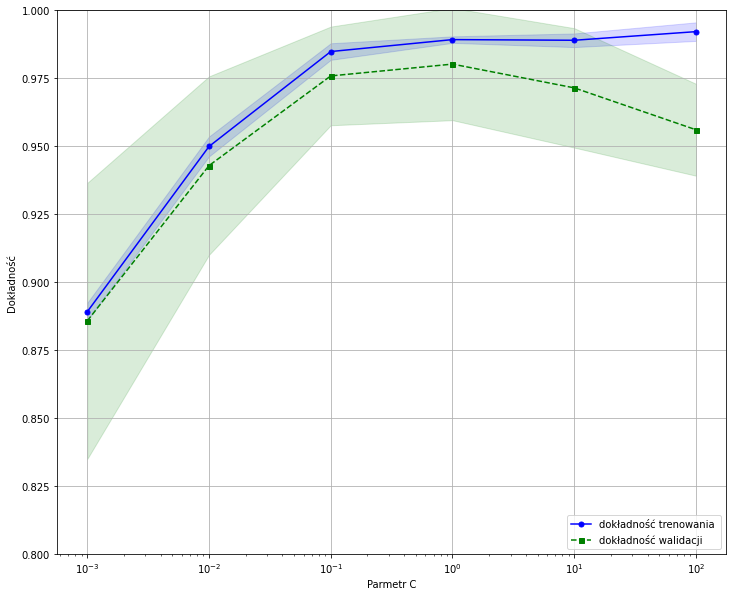

In [72]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=train_data,
                                            y=train_label,
                                            param_name="logisticregression__C",
                                            param_range=param_range,
                                            cv=10, 
                                            n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,10))
plt.plot(param_range, train_mean, color="blue",
        marker="o", markersize=5, label="dokładność trenowania ")
plt.fill_between(param_range, 
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15, color="blue")

plt.plot(param_range, test_mean, color="green", linestyle="--",
        marker="s", markersize=5, label="dokładność walidacji ")
plt.fill_between(param_range, 
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15, color="green")

plt.grid()
plt.xscale("log")
plt.xlabel("Parmetr C",color="red")
plt.ylabel("Dokładność",color="red")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.0])
plt.show()

### Dostrajanie metodą przesukiwania siatki - metoda pozwalajaca na zalezienie optymalnych hipermarametrów
technika polega na podaniu listy z hiperparametrami a komputer wybiera które sa najpesze 

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [74]:
pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,]

In [75]:
param_grid = [{"svc__C":param_range,
              "svc__kernel":["linear"]},
             {"svc__C":param_range,
              "svc__gamma":param_range,
              "svc__kernel":["rbf"]}]

In [76]:
grid = GridSearchCV(estimator=pipe_svc,
                   param_grid=param_grid,
                   scoring="accuracy",
                   cv=10,
                   refit=True, # autaomatyczne dopasowanie najlpszeych hiperparamtetrów do modelu
                   n_jobs=-1)

In [77]:
grid.fit(train_data, train_label)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [78]:
grid.best_score_

0.9846859903381642

In [79]:
grid.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

#### Testowanie modelu z najpeszymi hiperparametrami 

In [80]:
clf = grid.best_estimator_
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.9736842105263158

### Doobór algorytmu przez zagnieżdżony crossvalidation
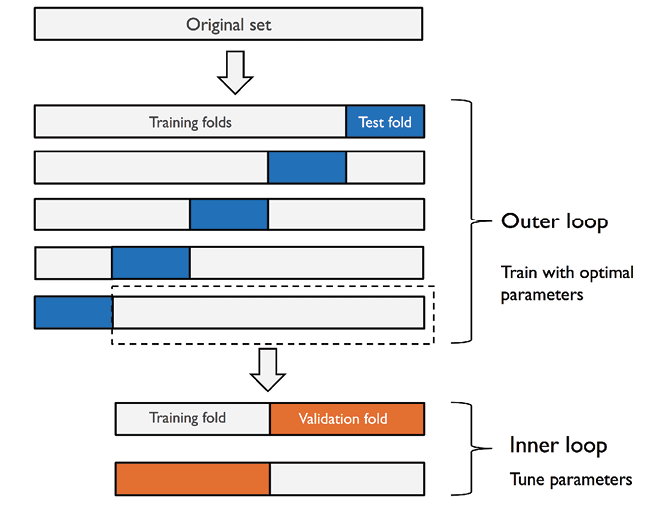

implematacja z siatką 

In [81]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring="accuracy",
                 cv=2)


In [82]:
scores = cross_val_score(gs, train_data, train_label, scoring="accuracy", cv=5)
print("dokładności sprawdzianu kżyzowego:", np.mean(scores), "+/-",np.std(scores))


dokładności sprawdzianu kżyzowego: 0.9736263736263737 +/- 0.014906219743132467


algortym dobrze nadaje sie do predykcji 

#### Zagnieżdzona crossvalidacja dla Randomtree 

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
tree = DecisionTreeClassifier()

In [85]:
gs_ = GridSearchCV(estimator=tree,
                  param_grid=[{"max_depth":[1,2,3,4,5,6,7, None]}],
                  scoring="accuracy",
                  cv=2)

In [86]:
scores = cross_val_score(gs_, train_data, train_label, scoring="accuracy", cv=5)
print("dokładności sprawdzianu kżyzowego:", np.mean(scores), "+/-",np.std(scores))


dokładności sprawdzianu kżyzowego: 0.9296703296703297 +/- 0.02655614499691116


### Precyzja Pełność F1 i confiusion matrix !
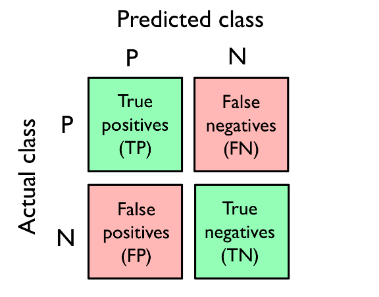

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
pipe_svc.fit(train_data, train_label)
y_pred = pipe_svc.predict(test_data)
matrix = confusion_matrix(y_true=test_label, y_pred=y_pred)

In [89]:
matrix

array([[71,  1],
       [ 2, 40]], dtype=int64)

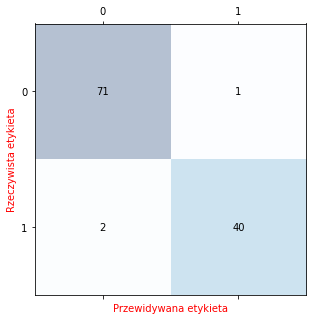

In [115]:
## matshow - służy do wyświetlania macierzy 
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,
               s=matrix[i,j], va="center", ha="center")
plt.xlabel("Przewidywana etykieta",color="red")
plt.ylabel("Rzeczywista etykieta",color="red")
plt.show()

- klasa 1 (nowotwory złośliwe)
- klasa 0 (nowotwory łagodny)

#### 71 przypadków z klasą 0 (TN),    40 przadków z klasą 1 (TP),   
#### 2 przypadki nieprawidłowo uznane za klase 1,  FP
#### 1 przypadek nieprawidłowo uznany za klase 0,  FN


###  Błąd = iloraz sumy fałszywych przewidywań przez sume wszystkich prognoz
### Accuracy = 1 - Błąd
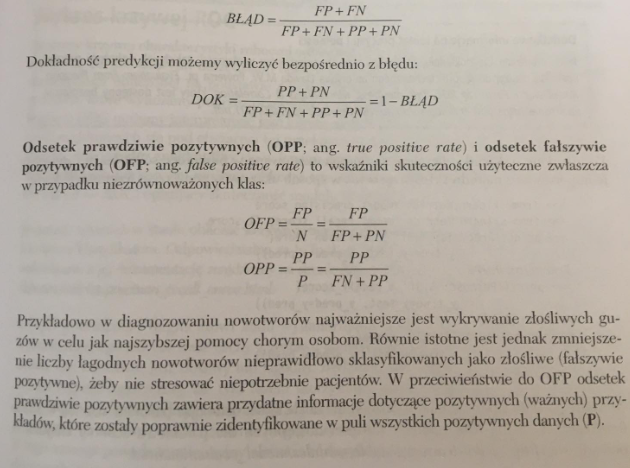
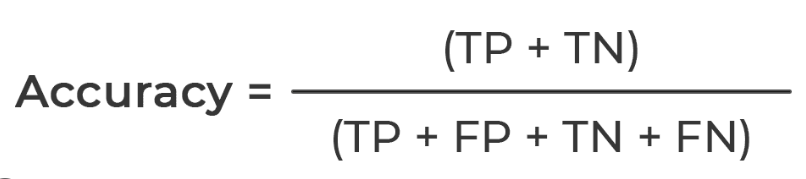

### Precision i Recall - sa powiązane z OPP 
### F1 optymalizacja precyzji i pełności 
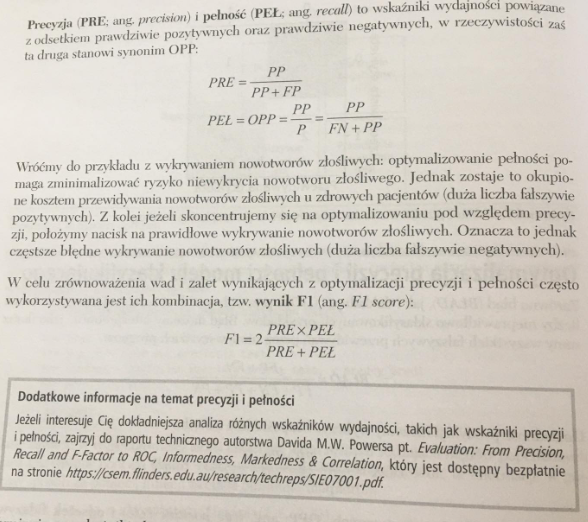

In [91]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


In [94]:
print("precyzja:", precision_score(y_true=test_label, y_pred=y_pred)*100, "%")

precyzja: 97.5609756097561 %


In [95]:
print("pełność:", recall_score(y_true=test_label, y_pred=y_pred)*100, "%")

pełność: 95.23809523809523 %


In [96]:
print("f1:", f1_score(y_true=test_label, y_pred=y_pred)*100, "%")

f1: 96.3855421686747 %


1 - pozytwna klasa. Definicja innej pozytwnej klasy 

In [97]:
from sklearn.metrics import make_scorer

In [101]:
c_gamma = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{"svc__C":c_gamma,
              "svc__kernel":["linear"]},
             {"svc__C":c_gamma,
             "svc__gamma":c_gamma,
             "svc__kernel":["rbf"]}]
scorer = make_scorer(f1_score, pos_label=0)


In [102]:
gs_ = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs_.fit(train_data, train_label)
print(gs_.best_score_)

In [103]:
gs_.fit(train_data, train_label)
print(gs_.best_score_)

0.9861994953378878


In [105]:
gs_.best_params_

{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

### Krzywa ROC 
Oblicza sie na podstawie OFP i PP, wyliczanych z przesuniącia progu decyzyjnego. Przekatna to losowe zgaywanie a obszar pod wykresem to modele gorsze niż zgadywnie. 

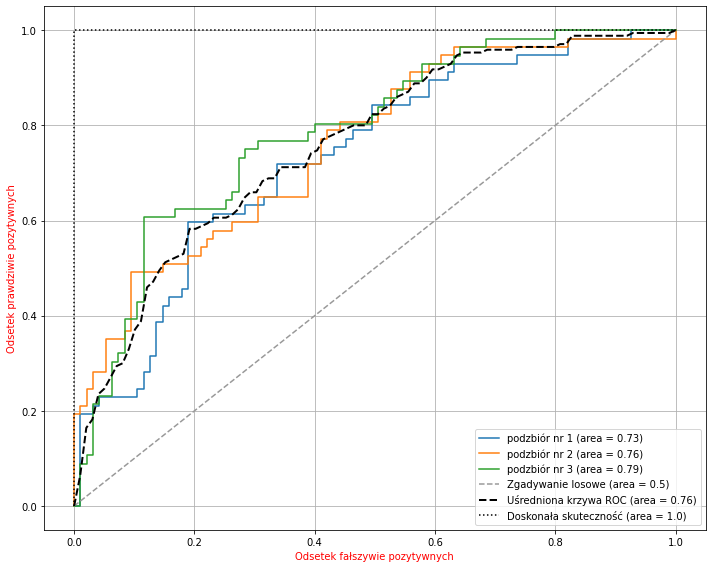

In [116]:
from sklearn.metrics import roc_curve, auc
from numpy import interp


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

X_train2 = train_data[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(train_data, train_label))

fig = plt.figure(figsize=(10, 8))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         train_label[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(train_label[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'podzbiór nr {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Zgadywanie losowe (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Uśredniona krzywa ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Doskonała skuteczność (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych', color="red")
plt.ylabel('Odsetek prawdziwie pozytywnych',color="red")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

### !! Wskaźniki dla klasyfikacji wieloklasowej !!
#### W scikt-learn jest domyślnie zaimplementowana :
- mikro-uśrednianie - polega na zliczaniu średnje prognozy dla każdego przykładu 
- makro-uśrednianie - uśredniona watrość sumy wszystkich precyzji 

In [125]:
#### Wybieranie konkretnej ###

pre_scor = make_scorer(score_func=precision_score,
                      pos_label=1,
                      greater_is_better=True,
                      average="micro")

gs_1 = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=pre_scor,
                  cv=10)
gs_1.fit(train_data, train_label)
print(gs_1.best_score_)

0.9824154589371981


### Dysproporcje klas 
- 357 - klas przykładów nowotworu łagodnego
- 40 - klas przykładów nowtworu złośliwego 

In [127]:
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))

In [129]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred==y_imb) *100

89.92443324937027

Na model ma większy wpływ wieksza ilość klas, ponieważ na tej podstawie oblicza sie f. kosztu. Można ustawić parametr [clas_weight = "balnaced"], wtedy wagi są optymalizowne na równi z każda wartością (balans pomiedzy wiekszą i mniejszą ilościa klas). Resample - to losowanie ze zwracaniem, w przypadku uczenia z 40 elemtoiwego zbioru losowane sa przykłady odpowiadające innej klasie (357 -kl. 1, 40 - kl.2, losowanie 357x kl. 2)

In [130]:
from sklearn.utils import resample

In [133]:
print("liczba przykładów kl.1 przed resample:", X_imb[y_imb==1].shape[0])

liczba przykładów przed resample: 40


In [136]:
X_up, y_up = resample(X_imb[y_imb==1],
                     y_imb[y_imb==1],
                     replace=True,
                     n_samples=X_imb[y_imb==0].shape[0],
                     random_state=123)
print("liczba przykładów z kl 1 po resample:", X_up[y_up==1].shape[0])

liczba przykładów z kl 1 po resample: 357


In [139]:
## równoważenie zbioru
X_bal = np.vstack((X[y==0], X_up))
y_bal = np.hstack((y[y==0], y_up))

In [140]:
# powinno być około 50%
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred==y_bal) *100

50.0